### Importación de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Cargar dataset

In [2]:
df = pd.read_csv("taggedImages_1.csv")
df

,id,name,commune,idImage,category
0,639fe02482eca73f9e753d00,NOMBRE POSTMAN,Arica,64cdf2d1dcc5516e83c5314b,Prevención
1,639fe02482eca73f9e753d00,NOMBRE POSTMAN,Arica,64cdf2d1dcc5516e83c5314b,Prevención
2,639fe02482eca73f9e753d00,NOMBRE POSTMAN,Arica,64cdf2d1dcc5516e83c5314b,Prevención
3,639fe02482eca73f9e753d00,NOMBRE POSTMAN,Arica,64cdf2d1dcc5516e83c5314b,Prevención
4,639fe02482eca73f9e753d00,NOMBRE POSTMAN,Arica,64cdf2d1dcc5516e83c5314b,Prevención
...,...,...,...,...,...
549,651d96dabff096239aeccc0f,d6d37o@mail.com,NaN,64cdf342dcc5516e83c5321e,Mitigación
550,651d96dabff096239aeccc0f,d6d37o@mail.com,NaN,64cdf2dbdcc5516e83c531d5,Mitigación
551,651d96dabff096239aeccc0f,d6d37o@mail.com,NaN,64cdf3a6dcc5516e83c53345,Mitigación
552,651d96dabff096239aeccc0f,d6d37o@mail.com,NaN,64cdf3d6dcc5516e83c5339c,Mitigación


### Análisis exploratorio

In [3]:
# Mostrar los valores únicos de la columna "commune"
unique_communes = df['commune'].unique()
print("Valores únicos de la columna 'commune':")
print(unique_communes)

Valores únicos de la columna 'commune':
['Arica' 'Valdivia' 'Los Lagos' 'Paillaco' 'La Unión' nan 'Corral']


In [4]:
# Mostrar los valores únicos de la columna "idImage"
unique_idImage = df['idImage'].unique()
print("Valores únicos de la columna 'idImage':")
print(unique_idImage)

Valores únicos de la columna 'idImage':
['64cdf2d1dcc5516e83c5314b' '64cdf2d2dcc5516e83c5314d'
 '64cdf2d3dcc5516e83c5314f' '64cdf2d3dcc5516e83c53151'
 '64cdf2d3dcc5516e83c53153' '64cdf2d3dcc5516e83c53155'
 '64cdf2d3dcc5516e83c53157' '64cdf2d6dcc5516e83c5318d'
 '64cdf351dcc5516e83c532e4' '64cdf3a1dcc5516e83c53309'
 '64cdf351dcc5516e83c532ee' '64cdf3a5dcc5516e83c53341'
 '64cdf341dcc5516e83c53212' '64cdf2d5dcc5516e83c53177'
 '64cdf344dcc5516e83c53246' '64cdf2d7dcc5516e83c531a7'
 '64cdf34edcc5516e83c532c2' '64cdf347dcc5516e83c53266'
 '64cdf34fdcc5516e83c532ca' '64cdf2d7dcc5516e83c5319b'
 '64cdf2d8dcc5516e83c531b3' '64cdf348dcc5516e83c53276'
 '64cdf2d6dcc5516e83c53183' '64cdf342dcc5516e83c53216'
 '64cdf3a1dcc5516e83c532ff' '64cdf3a1dcc5516e83c53307'
 '64cdf348dcc5516e83c53274' '64cdf2d7dcc5516e83c531a3'
 '64cdf3a2dcc5516e83c53311' '64cdf34adcc5516e83c5328e'
 '64cdf3a4dcc5516e83c53333' '64cdf2d3dcc5516e83c53159'
 '64cdf2d4dcc5516e83c5315b' '64cdf2d4dcc5516e83c5315d'
 '64cdf2d4dcc5516e83c5315

In [5]:
print("Total de imágenes mostradas a los usuarios: ", len(unique_idImage))

Total de imágenes mostradas a los usuarios:  99


### Categoría correcta para cada imagen

In [6]:
# Crear un diccionario que mapee cada rango de imágenes a su categoría correcta
categoria_correcta = {
    '64cdf2d1dcc5516e83c5314b': 'Mitigación',
    '64cdf2d2dcc5516e83c5314d': 'Mitigación',
    '64cdf2d3dcc5516e83c5314f': 'Mitigación',
    '64cdf2d3dcc5516e83c53151': 'Mitigación',
    '64cdf2d3dcc5516e83c53153': 'Mitigación',
    '64cdf2d3dcc5516e83c53155': 'Mitigación',
    '64cdf2d3dcc5516e83c53157': 'Mitigación',
    '64cdf2d6dcc5516e83c5318d': 'Mitigación',
    '64cdf351dcc5516e83c532e4': 'Mitigación',
    '64cdf3a1dcc5516e83c53309': 'Mitigación',
    '64cdf351dcc5516e83c532ee': 'Mitigación',
    '64cdf3a5dcc5516e83c53341': 'Mitigación',
    '64cdf341dcc5516e83c53212': 'Mitigación',
    '64cdf2d5dcc5516e83c53177': 'Mitigación',
    '64cdf344dcc5516e83c53246': 'Mitigación',
    '64cdf2d7dcc5516e83c531a7': 'Mitigación',
    '64cdf34edcc5516e83c532c2': 'Mitigación',
    '64cdf347dcc5516e83c53266': 'Mitigación',
    '64cdf34fdcc5516e83c532ca': 'Mitigación',
    '64cdf2d7dcc5516e83c5319b': 'Mitigación',
    '64cdf2d8dcc5516e83c531b3': 'Mitigación',
    '64cdf348dcc5516e83c53276': 'Mitigación',
    '64cdf2d6dcc5516e83c53183': 'Mitigación',
    '64cdf342dcc5516e83c53216': 'Mitigación',
    '64cdf3a1dcc5516e83c532ff': 'Mitigación',
    '64cdf3a1dcc5516e83c53307': 'Mitigación',
    '64cdf348dcc5516e83c53274': 'Mitigación',
    '64cdf2d7dcc5516e83c531a3': 'Mitigación',
    '64cdf3a2dcc5516e83c53311': 'Mitigación',
    '64cdf34adcc5516e83c5328e': 'Mitigación',
    '64cdf3a4dcc5516e83c53333': 'Mitigación',
    '64cdf2d3dcc5516e83c53159': 'Mitigación',
    '64cdf2d4dcc5516e83c5315b': 'Recuperación',
    '64cdf2d4dcc5516e83c5315d': 'Recuperación',
    '64cdf2d4dcc5516e83c5315f': 'Recuperación',
    '64cdf2d4dcc5516e83c53161': 'Recuperación',
    '64cdf2d4dcc5516e83c53163': 'Recuperación',
    '64cdf2d4dcc5516e83c53165': 'Recuperación',
    '64cdf2d4dcc5516e83c53167': 'Recuperación',
    '64cdf2d4dcc5516e83c53169': 'Recuperación',
    '64cdf2d4dcc5516e83c5316b': 'Recuperación',
    '64cdf2d4dcc5516e83c5316d': 'Recuperación',
    '64cdf2d5dcc5516e83c5316f': 'Recuperación',
    '64cdf2d5dcc5516e83c53171': 'Recuperación',
    '64cdf2d5dcc5516e83c53173': 'Recuperación',
    '64cdf2d5dcc5516e83c53175': 'Recuperación',
    '64cdf2d5dcc5516e83c53179': 'Recuperación',
    '64cdf2d5dcc5516e83c5317b': 'Recuperación',
    '64cdf2d5dcc5516e83c5317d': 'Recuperación',
    '64cdf2d5dcc5516e83c5317f': 'Recuperación',
    '64cdf2d5dcc5516e83c53181': 'Recuperación',
    '64cdf2d6dcc5516e83c53185': 'Recuperación',
    '64cdf2d6dcc5516e83c53187': 'Recuperación',
    '64cdf2d6dcc5516e83c53189': 'Recuperación',
    '64cdf2d6dcc5516e83c5318b': 'Recuperación',
    '64cdf2d6dcc5516e83c5318f': 'Recuperación',
    '64cdf2d6dcc5516e83c53191': 'Recuperación',
    '64cdf2d6dcc5516e83c53193': 'Recuperación',
    '64cdf2d6dcc5516e83c53195': 'Recuperación',
    '64cdf2d7dcc5516e83c53197': 'Recuperación',
    '64cdf2d7dcc5516e83c53199': 'Recuperación',
    '64cdf2d7dcc5516e83c5319d': 'Recuperación',
    '64cdf2d7dcc5516e83c5319f': 'Recuperación',
    '64cdf2d7dcc5516e83c531a1': 'Recuperación',
    '64cdf2d7dcc5516e83c531a5': 'Recuperación',
    '64cdf342dcc5516e83c53222': 'Recuperación',
    '64cdf3d4dcc5516e83c53388': 'Recuperación',
    '64cdf34bdcc5516e83c5329c': 'Recuperación',
    '64cdf344dcc5516e83c5323e': 'Recuperación',
    '64cdf351dcc5516e83c532e6': 'Recuperación',
    '64cdf344dcc5516e83c53244': 'Recuperación',
    '64cdf3d6dcc5516e83c5339a': 'Recuperación',
    '64cdf3a3dcc5516e83c5331d': 'Recuperación',
    '64cdf3d6dcc5516e83c533a6': 'Respuesta',
    '64cdf34edcc5516e83c532bc': 'Respuesta',
    '64cdf34bdcc5516e83c53298': 'Respuesta',
    '64cdf350dcc5516e83c532d4': 'Respuesta',
    '64cdf3a4dcc5516e83c5332d': 'Respuesta',
    '64cdf3d2dcc5516e83c53366': 'Respuesta',
    '64cdf3d7dcc5516e83c533ac': 'Prevención',
    '64cdf346dcc5516e83c5325a': 'Prevención',
    '64cdf3d3dcc5516e83c53372': 'Prevención',
    '64cdf34adcc5516e83c53288': 'Prevención',
    '64cdf34cdcc5516e83c532a0': 'Prevención',
    '64cdf2dfdcc5516e83c531f7': 'Prevención',
    '64cdf34fdcc5516e83c532ce': 'Prevención',
    '64cdf2dadcc5516e83c531bd': 'Prevención',
    '64cdf342dcc5516e83c53228': 'Prevención',
    '64cdf3d2dcc5516e83c5335c': 'Respuesta',
    '64cdf3d3dcc5516e83c5336e': 'Respuesta',
    '64cdf34adcc5516e83c53286': 'Respuesta',
    '64cdf349dcc5516e83c5327a': 'Respuesta',
    '64cdf2d8dcc5516e83c531ad': 'Respuesta',
    '64cdf34bdcc5516e83c53292': 'Respuesta',
    '64cdf352dcc5516e83c532f0': 'Prevención',
    '64cdf342dcc5516e83c5321e': 'Prevención',
    '64cdf2dbdcc5516e83c531d5': 'Prevención',
    '64cdf3a6dcc5516e83c53345': 'Prevención',
    '64cdf3d6dcc5516e83c5339c': 'Prevención'
}


In [7]:
# Crear una nueva columna 'Categoria Correcta' en el DataFrame original
df['Categoria Correcta'] = df['idImage'].map(categoria_correcta)

# Mostrar la tabla con las columnas 'idImage' y 'Categoria Correcta'
print("Tabla con Categoría Correcta:")
print(df[['idImage', 'Categoria Correcta']])

Tabla con Categoría Correcta:
                      idImage Categoria Correcta
0    64cdf2d1dcc5516e83c5314b         Mitigación
1    64cdf2d1dcc5516e83c5314b         Mitigación
2    64cdf2d1dcc5516e83c5314b         Mitigación
3    64cdf2d1dcc5516e83c5314b         Mitigación
4    64cdf2d1dcc5516e83c5314b         Mitigación
..                        ...                ...
549  64cdf342dcc5516e83c5321e         Prevención
550  64cdf2dbdcc5516e83c531d5         Prevención
551  64cdf3a6dcc5516e83c53345         Prevención
552  64cdf3d6dcc5516e83c5339c         Prevención
553  64cdf2d7dcc5516e83c5319b         Mitigación

[554 rows x 2 columns]


In [8]:
df

,id,name,commune,idImage,category,Categoria Correcta
0,639fe02482eca73f9e753d00,NOMBRE POSTMAN,Arica,64cdf2d1dcc5516e83c5314b,Prevención,Mitigación
1,639fe02482eca73f9e753d00,NOMBRE POSTMAN,Arica,64cdf2d1dcc5516e83c5314b,Prevención,Mitigación
2,639fe02482eca73f9e753d00,NOMBRE POSTMAN,Arica,64cdf2d1dcc5516e83c5314b,Prevención,Mitigación
3,639fe02482eca73f9e753d00,NOMBRE POSTMAN,Arica,64cdf2d1dcc5516e83c5314b,Prevención,Mitigación
4,639fe02482eca73f9e753d00,NOMBRE POSTMAN,Arica,64cdf2d1dcc5516e83c5314b,Prevención,Mitigación
...,...,...,...,...,...,...
549,651d96dabff096239aeccc0f,d6d37o@mail.com,NaN,64cdf342dcc5516e83c5321e,Mitigación,Prevención
550,651d96dabff096239aeccc0f,d6d37o@mail.com,NaN,64cdf2dbdcc5516e83c531d5,Mitigación,Prevención
551,651d96dabff096239aeccc0f,d6d37o@mail.com,NaN,64cdf3a6dcc5516e83c53345,Mitigación,Prevención
552,651d96dabff096239aeccc0f,d6d37o@mail.com,NaN,64cdf3d6dcc5516e83c5339c,Mitigación,Prevención


In [9]:
# Mostrar los valores únicos de las columnas 'idImage' y 'Categoria Correcta'
unique_idImage_category = df[['idImage', 'Categoria Correcta']].drop_duplicates()
print("Valores únicos de las columnas 'idImage' y 'Categoria Correcta':")
print(unique_idImage_category)


Valores únicos de las columnas 'idImage' y 'Categoria Correcta':
                      idImage Categoria Correcta
0    64cdf2d1dcc5516e83c5314b         Mitigación
8    64cdf2d2dcc5516e83c5314d         Mitigación
9    64cdf2d3dcc5516e83c5314f         Mitigación
10   64cdf2d3dcc5516e83c53151         Mitigación
11   64cdf2d3dcc5516e83c53153         Mitigación
..                        ...                ...
488  64cdf352dcc5516e83c532f0         Prevención
489  64cdf342dcc5516e83c5321e         Prevención
490  64cdf2dbdcc5516e83c531d5         Prevención
491  64cdf3a6dcc5516e83c53345         Prevención
492  64cdf3d6dcc5516e83c5339c         Prevención

[99 rows x 2 columns]


In [10]:
# Mostrar los valores únicos de la columna "name" (users)
unique_users = df['name'].unique()
print("Cantidad de usuarios: ",len(unique_users))


Cantidad de usuarios:  30


### Filtrado por comunas de Paillaco y Valdivia

In [11]:
# Filtrar el DataFrame por las comunas de interés
comunas_interes = ['Paillaco', 'Valdivia']
df_filtrado = df[df['commune'].isin(comunas_interes)]

# Contar la cantidad de usuarios por comuna
cantidad_usuarios_por_comuna = df_filtrado.groupby('commune')['name'].nunique()

# Imprimir resultados
print("Cantidad de usuarios por comuna:")
print(cantidad_usuarios_por_comuna)

Cantidad de usuarios por comuna:
commune
Paillaco     6
Valdivia    17
Name: name, dtype: int64


### Análisis Descriptivo

In [12]:
df_filtrado

,id,name,commune,idImage,category,Categoria Correcta
96,64c7ebc607c73a5ecf5836fe,4itzwx@mail.com,Valdivia,64cdf2d1dcc5516e83c5314b,Mitigación,Mitigación
97,64c7ebc607c73a5ecf5836fe,4itzwx@mail.com,Valdivia,64cdf2d2dcc5516e83c5314d,Respuesta,Mitigación
98,64c7ebc607c73a5ecf5836fe,4itzwx@mail.com,Valdivia,64cdf2d3dcc5516e83c5314f,Recuperación,Mitigación
99,64c7ebc607c73a5ecf5836fe,4itzwx@mail.com,Valdivia,64cdf2d3dcc5516e83c53151,Mitigación,Mitigación
100,64c7ebc607c73a5ecf5836fe,4itzwx@mail.com,Valdivia,64cdf2d3dcc5516e83c53153,Mitigación,Mitigación
...,...,...,...,...,...,...
469,64f9cd040f70bda595825be6,3uljfr@mail.com,Valdivia,64cdf2d3dcc5516e83c53159,Recuperación,Mitigación
470,6512f197bff096239ae8bcd6,dvlofp@mail.com,Valdivia,64cdf2d1dcc5516e83c5314b,Prevención,Mitigación
471,6512f197bff096239ae8bcd6,dvlofp@mail.com,Valdivia,64cdf2d3dcc5516e83c5314f,Recuperación,Mitigación
472,6512f197bff096239ae8bcd6,dvlofp@mail.com,Valdivia,64cdf2d3dcc5516e83c53153,Mitigación,Mitigación


In [15]:
# Crear arreglos para usuarios de Paillaco y Valdivia con idImage y category
usuarios_paillaco = df_filtrado[df_filtrado['commune'] == 'Paillaco'][['name', 'idImage', 'category','Categoria Correcta']].to_numpy()
usuarios_valdivia = df_filtrado[df_filtrado['commune'] == 'Valdivia'][['name', 'idImage', 'category','Categoria Correcta']].to_numpy()

# Imprimir resultados
print("Usuarios de Paillaco:")
print(usuarios_paillaco)
print("\nUsuarios de Valdivia:")
print(usuarios_valdivia)

Usuarios de Paillaco:
[['6tcysh@mail.com' '64cdf2d1dcc5516e83c5314b' 'Recuperación'
  'Mitigación']
 ['6tcysh@mail.com' '64cdf2d2dcc5516e83c5314d' 'Mitigación' 'Mitigación']
 ['cb3dlp@mail.com' '64cdf2d1dcc5516e83c5314b' 'Recuperación'
  'Mitigación']
 ['cb3dlp@mail.com' '64cdf2d2dcc5516e83c5314d' 'Prevención' 'Mitigación']
 ['cb3dlp@mail.com' '64cdf2d3dcc5516e83c5314f' 'Prevención' 'Mitigación']
 ['cb3dlp@mail.com' '64cdf2d3dcc5516e83c53151' 'Prevención' 'Mitigación']
 ['cb3dlp@mail.com' '64cdf2d3dcc5516e83c53153' 'Prevención' 'Mitigación']
 ['cb3dlp@mail.com' '64cdf2d3dcc5516e83c53155' 'Prevención' 'Mitigación']
 ['cb3dlp@mail.com' '64cdf2d3dcc5516e83c53157' 'Mitigación' 'Mitigación']
 ['cb3dlp@mail.com' '64cdf2d3dcc5516e83c53159' 'Mitigación' 'Mitigación']
 ['cb3dlp@mail.com' '64cdf2d4dcc5516e83c5315b' 'Recuperación'
  'Recuperación']
 ['cb3dlp@mail.com' '64cdf2d4dcc5516e83c5315d' 'Mitigación'
  'Recuperación']
 ['cb3dlp@mail.com' '64cdf2d4dcc5516e83c5315f' 'Prevención'
  'Recuperac

### Visualizar categorizaciones de Imagen según los usuarios de Paillaco y Valdivia

In [16]:
# Convertir arreglos a DataFrames de pandas
df_paillaco = pd.DataFrame(usuarios_paillaco, columns=['name', 'idImage', 'category','Categoria Correcta'])
df_valdivia = pd.DataFrame(usuarios_valdivia, columns=['name', 'idImage', 'category','Categoria Correcta'])

# Contar la cantidad de respuestas por categoría por cada idImage en Paillaco
count_paillaco = df_paillaco.groupby(['idImage', 'category']).size().unstack(fill_value=0)

# Contar la cantidad de respuestas por categoría por cada idImage en Valdivia
count_valdivia = df_valdivia.groupby(['idImage', 'category']).size().unstack(fill_value=0)

# Obtener la categoría más elegida por cada idImage en Paillaco
df_paillaco['Categoria más elegida'] = df_paillaco.groupby('idImage')['category'].transform(lambda x: x.value_counts().idxmax())

# Obtener la categoría más elegida por cada idImage en Valdivia
df_valdivia['Categoria más elegida'] = df_valdivia.groupby('idImage')['category'].transform(lambda x: x.value_counts().idxmax())

# Mostrar los resultados
print("Usuarios de Paillaco:")
print(count_paillaco)


print("\nUsuarios de Valdivia:")
print(count_valdivia)



Usuarios de Paillaco:
category                  Mitigación  Prevención  Recuperación  Respuesta
idImage                                                                  
64cdf2d1dcc5516e83c5314b           0           4             2          0
64cdf2d2dcc5516e83c5314d           1           4             0          0
64cdf2d3dcc5516e83c5314f           0           3             1          0
64cdf2d3dcc5516e83c53151           0           2             1          0
64cdf2d3dcc5516e83c53153           0           3             1          0
64cdf2d3dcc5516e83c53155           0           5             0          0
64cdf2d3dcc5516e83c53157           1           0             1          0
64cdf2d3dcc5516e83c53159           1           2             1          0
64cdf2d4dcc5516e83c5315b           0           0             1          1
64cdf2d4dcc5516e83c5315d           1           1             0          0
64cdf2d4dcc5516e83c5315f           0           2             0          0
64cdf2d4dcc5516e

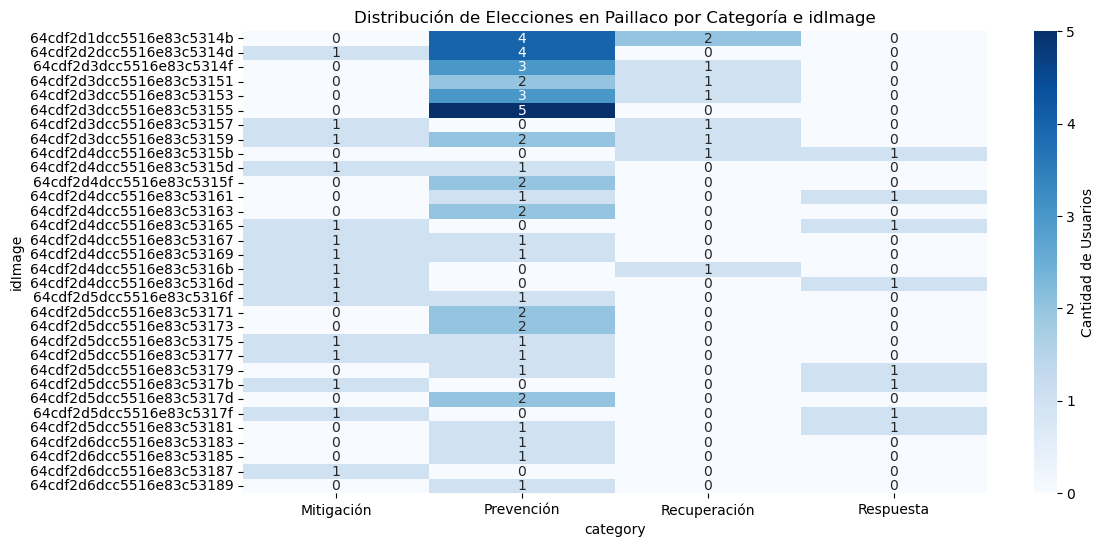

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la distribución de elecciones para Paillaco
plt.figure(figsize=(12, 6))
sns.heatmap(count_paillaco, cmap="Blues", annot=True, fmt="d", cbar_kws={'label': 'Cantidad de Usuarios'})
plt.title('Distribución de Elecciones en Paillaco por Categoría e idImage')
plt.show()


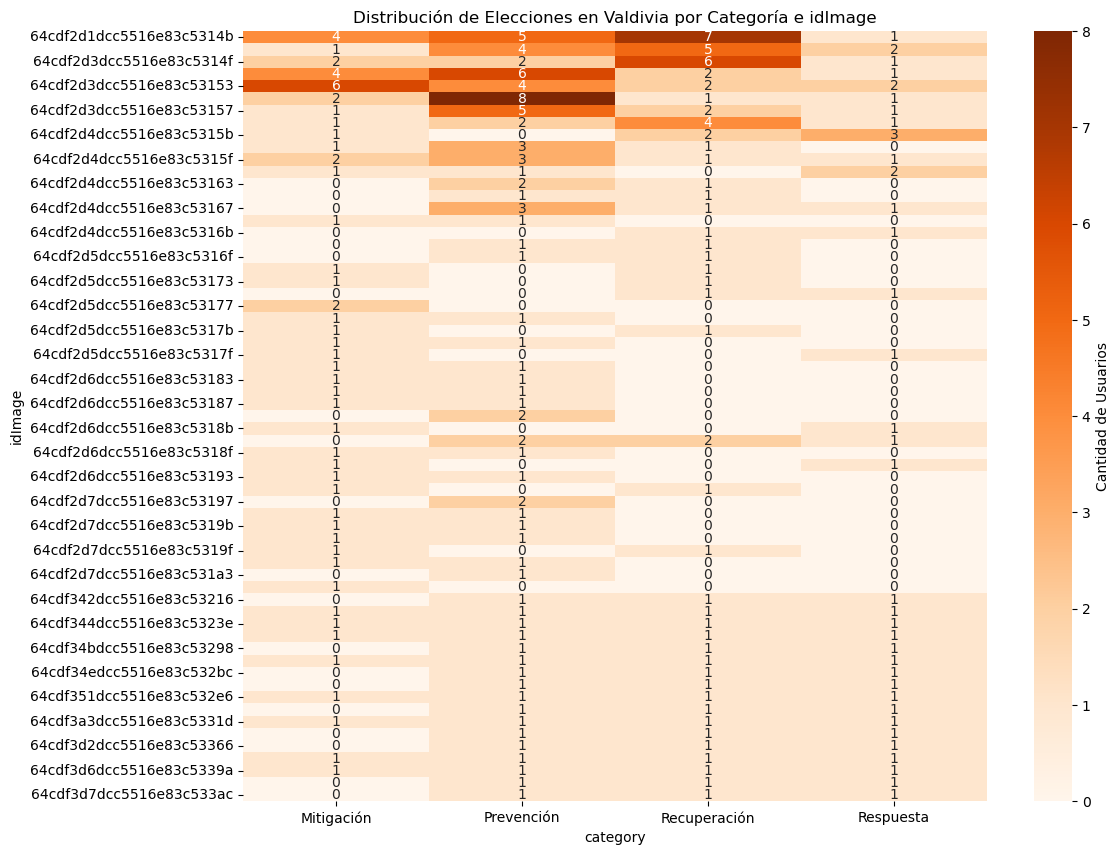

In [18]:
# Visualizar la distribución de elecciones para Valdivia
plt.figure(figsize=(12, 10))
sns.heatmap(count_valdivia, cmap="Oranges", annot=True, fmt="d", cbar_kws={'label': 'Cantidad de Usuarios'})
plt.title('Distribución de Elecciones en Valdivia por Categoría e idImage')
plt.show()

### Categoría con mayor número según cada imagen

In [19]:
print("\nCategoría más elegida en Paillaco:")
print(df_paillaco[['idImage', 'Categoria más elegida']].drop_duplicates().set_index('idImage'))
print("\nCategoría más elegida en Valdivia:")
print(df_valdivia[['idImage', 'Categoria más elegida']].drop_duplicates().set_index('idImage'))


Categoría más elegida en Paillaco:
                         Categoria más elegida
idImage                                       
64cdf2d1dcc5516e83c5314b            Prevención
64cdf2d2dcc5516e83c5314d            Prevención
64cdf2d3dcc5516e83c5314f            Prevención
64cdf2d3dcc5516e83c53151            Prevención
64cdf2d3dcc5516e83c53153            Prevención
64cdf2d3dcc5516e83c53155            Prevención
64cdf2d3dcc5516e83c53157            Mitigación
64cdf2d3dcc5516e83c53159            Prevención
64cdf2d4dcc5516e83c5315b          Recuperación
64cdf2d4dcc5516e83c5315d            Mitigación
64cdf2d4dcc5516e83c5315f            Prevención
64cdf2d4dcc5516e83c53161            Prevención
64cdf2d4dcc5516e83c53163            Prevención
64cdf2d4dcc5516e83c53165            Mitigación
64cdf2d4dcc5516e83c53167            Mitigación
64cdf2d4dcc5516e83c53169            Mitigación
64cdf2d4dcc5516e83c5316b            Mitigación
64cdf2d4dcc5516e83c5316d            Mitigación
64cdf2d5dcc5516e83c5316f

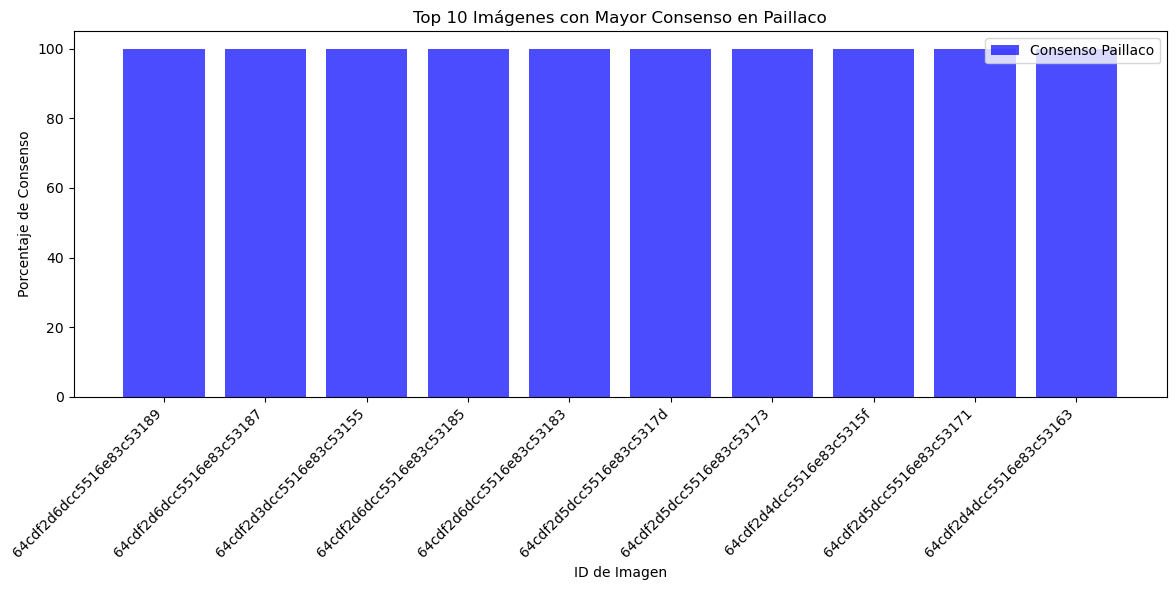

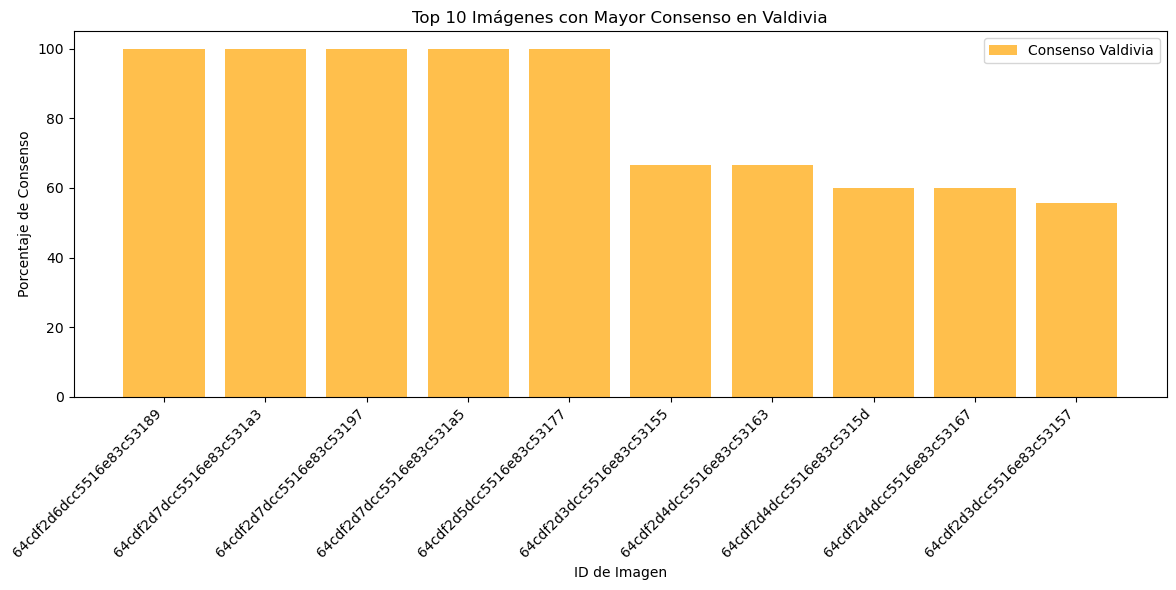

Respuestas Correctas para las 10 Imágenes con Mayor Consenso en Paillaco:
7       Mitigación
12    Recuperación
14    Recuperación
21    Recuperación
22    Recuperación
27    Recuperación
30      Mitigación
31    Recuperación
32    Recuperación
33    Recuperación
38      Mitigación
39      Mitigación
46      Mitigación
53    Recuperación
54    Recuperación
61    Recuperación
62    Recuperación
67    Recuperación
76      Mitigación
Name: Categoria Correcta, dtype: object

Categoría Más Elegida por los Usuarios en Paillaco:
7     Prevención
12    Prevención
14    Prevención
21    Prevención
22    Prevención
27    Prevención
30    Prevención
31    Prevención
32    Mitigación
33    Prevención
38    Prevención
39    Prevención
46    Prevención
53    Prevención
54    Prevención
61    Prevención
62    Prevención
67    Prevención
76    Prevención
Name: Categoria más elegida, dtype: object

Coincidencia con la Respuesta Correcta en Paillaco:
7     False
12    False
14    False
21    False
22   

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcular el porcentaje de consenso en Paillaco
consenso_paillaco = (count_paillaco.max(axis=1) / count_paillaco.sum(axis=1)) * 100

# Calcular el porcentaje de consenso en Valdivia
consenso_valdivia = (count_valdivia.max(axis=1) / count_valdivia.sum(axis=1)) * 100

# Obtener las 10 imágenes con mayor consenso en Paillaco
top_10_paillaco = consenso_paillaco.sort_values(ascending=False).head(10)
# Obtener las 10 imágenes con mayor consenso en Valdivia
top_10_valdivia = consenso_valdivia.sort_values(ascending=False).head(10)

# Crear un gráfico para las 10 imágenes con mayor consenso en Paillaco
plt.figure(figsize=(12, 6))
plt.bar(top_10_paillaco.index, top_10_paillaco, color='blue', alpha=0.7, label='Consenso Paillaco')
plt.title('Top 10 Imágenes con Mayor Consenso en Paillaco')
plt.xlabel('ID de Imagen')
plt.ylabel('Porcentaje de Consenso')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

# Crear un gráfico para las 10 imágenes con mayor consenso en Valdivia
plt.figure(figsize=(12, 6))
plt.bar(top_10_valdivia.index, top_10_valdivia, color='orange', alpha=0.7, label='Consenso Valdivia')
plt.title('Top 10 Imágenes con Mayor Consenso en Valdivia')
plt.xlabel('ID de Imagen')
plt.ylabel('Porcentaje de Consenso')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

# Obtener las respuestas correctas para las 10 imágenes con mayor consenso
respuestas_correctas_paillaco = df_paillaco[df_paillaco['idImage'].isin(top_10_paillaco.index)]['Categoria Correcta']
respuestas_correctas_valdivia = df_valdivia[df_valdivia['idImage'].isin(top_10_valdivia.index)]['Categoria Correcta']

# Obtener la categoría más elegida por los usuarios para las 10 imágenes con mayor consenso
categoria_mas_elegida_paillaco = df_paillaco[df_paillaco['idImage'].isin(top_10_paillaco.index)]['Categoria más elegida']
categoria_mas_elegida_valdivia = df_valdivia[df_valdivia['idImage'].isin(top_10_valdivia.index)]['Categoria más elegida']

# Verificar si la categoría más elegida coincide con la categoría correcta
coincidencia_paillaco = respuestas_correctas_paillaco == categoria_mas_elegida_paillaco
coincidencia_valdivia = respuestas_correctas_valdivia == categoria_mas_elegida_valdivia

# Mostrar las respuestas correctas y la coincidencia
print("Respuestas Correctas para las 10 Imágenes con Mayor Consenso en Paillaco:")
print(respuestas_correctas_paillaco)
print("\nCategoría Más Elegida por los Usuarios en Paillaco:")
print(categoria_mas_elegida_paillaco)
print("\nCoincidencia con la Respuesta Correcta en Paillaco:")
print(coincidencia_paillaco)

print("\nRespuestas Correctas para las 10 Imágenes con Mayor Consenso en Valdivia:")
print(respuestas_correctas_valdivia)
print("\nCategoría Más Elegida por los Usuarios en Valdivia:")
print(categoria_mas_elegida_valdivia)
print("\nCoincidencia con la Respuesta Correcta en Valdivia:")
print(coincidencia_valdivia)


In [23]:
# Imprimir la cantidad de coincidencias en Paillaco y Valdivia
print("\nCantidad de Coincidencias entre consenso y categoría correcta en Paillaco:", 
      coincidencia_paillaco.sum())
print("Cantidad de Coincidencias entre consenso y categoría correcta en Valdivia:",
      coincidencia_valdivia.sum())


Cantidad de Coincidencias en Paillaco: 0
Cantidad de Coincidencias en Valdivia: 2


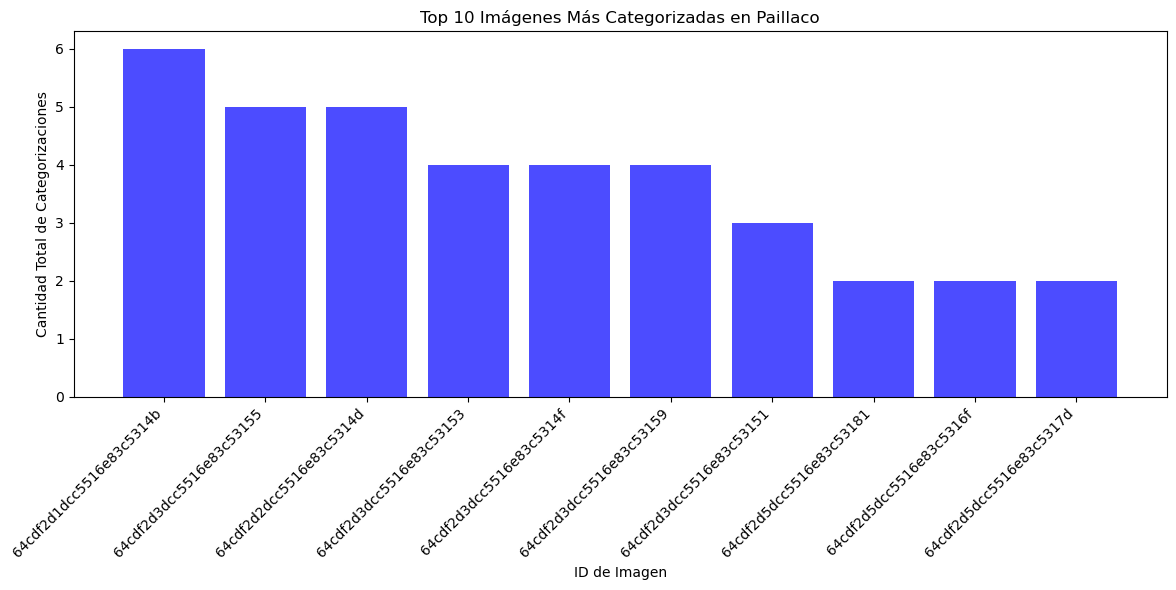

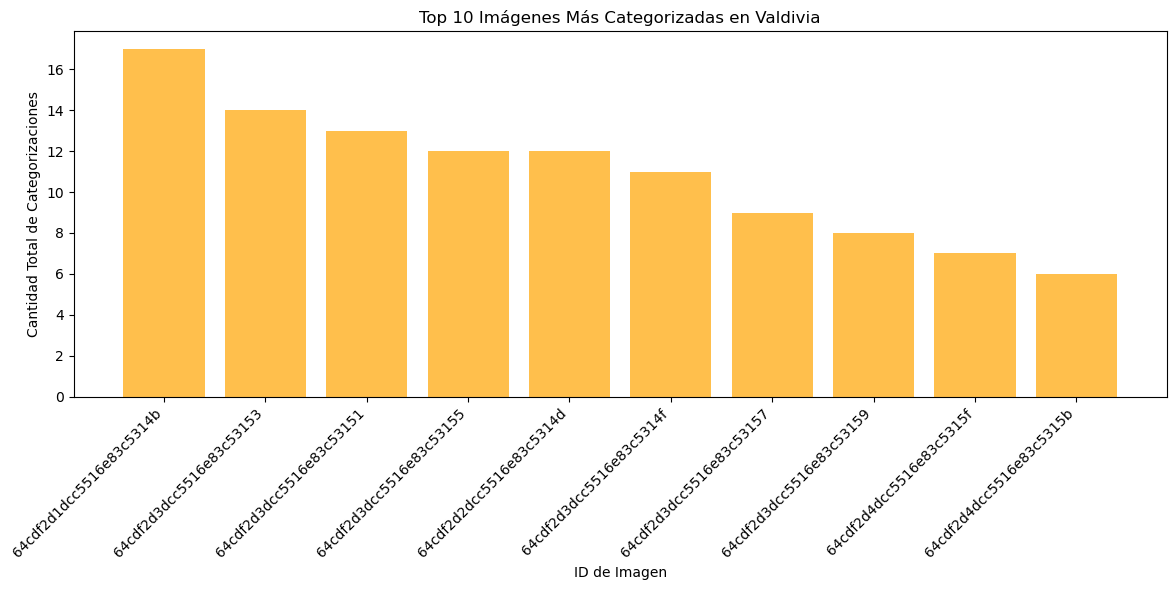

In [25]:
import matplotlib.pyplot as plt

# Calcular la cantidad total de categorizaciones por imagen en Paillaco
total_categorizaciones_paillaco = count_paillaco.sum(axis=1)

# Calcular la cantidad total de categorizaciones por imagen en Valdivia
total_categorizaciones_valdivia = count_valdivia.sum(axis=1)

# Obtener las 10 imágenes más categorizadas en Paillaco
top_10_paillaco = total_categorizaciones_paillaco.sort_values(ascending=False).head(10)

# Obtener las 10 imágenes más categorizadas en Valdivia
top_10_valdivia = total_categorizaciones_valdivia.sort_values(ascending=False).head(10)

# Crear el gráfico de barras para las 10 imágenes más categorizadas en Paillaco
plt.figure(figsize=(12, 6))
plt.bar(top_10_paillaco.index, top_10_paillaco, color='blue', alpha=0.7)
plt.title('Top 10 Imágenes Más Categorizadas en Paillaco')
plt.xlabel('ID de Imagen')
plt.ylabel('Cantidad Total de Categorizaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico de Paillaco
plt.show()

# Crear el gráfico de barras para las 10 imágenes más categorizadas en Valdivia
plt.figure(figsize=(12, 6))
plt.bar(top_10_valdivia.index, top_10_valdivia, color='orange', alpha=0.7)
plt.title('Top 10 Imágenes Más Categorizadas en Valdivia')
plt.xlabel('ID de Imagen')
plt.ylabel('Cantidad Total de Categorizaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico de Valdivia
plt.show()


In [26]:
# Definir colores para cada categoría
colores = {
    'Prevención': '#F1C232',
    'Mitigación': '#E69138',
    'Respuesta': '#CC0000',
    'Recuperación': '#6AA84F'
}

### Distribución de imágenes según la categoría correcta para cada una

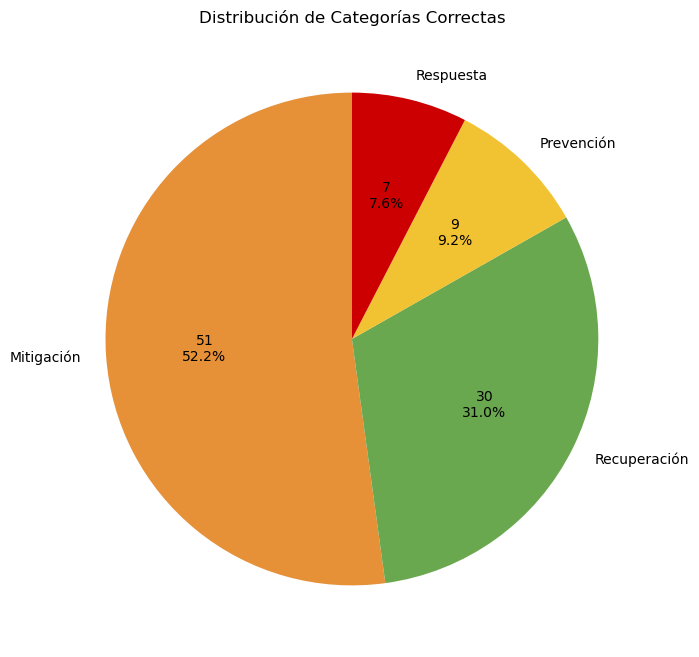

In [27]:
# Obtener la distribución de las categorías correctas
categoria_correcta_distribution = df['Categoria Correcta'].value_counts()

# Calcular el total de imágenes
total_imagenes = len(df['idImage'].unique())



# Graficar los resultados en un gráfico de pastel con colores personalizados
plt.figure(figsize=(8, 8))
plt.pie(categoria_correcta_distribution, labels=categoria_correcta_distribution.index,
        autopct=lambda p: f'{int(total_imagenes * p / 100)}\n{p:.1f}%', startangle=90,
        colors=[colores[categoria] for categoria in categoria_correcta_distribution.index])
plt.title('Distribución de Categorías Correctas')
plt.show()

### Distribución de categorizaciones de los usuarios según categoría

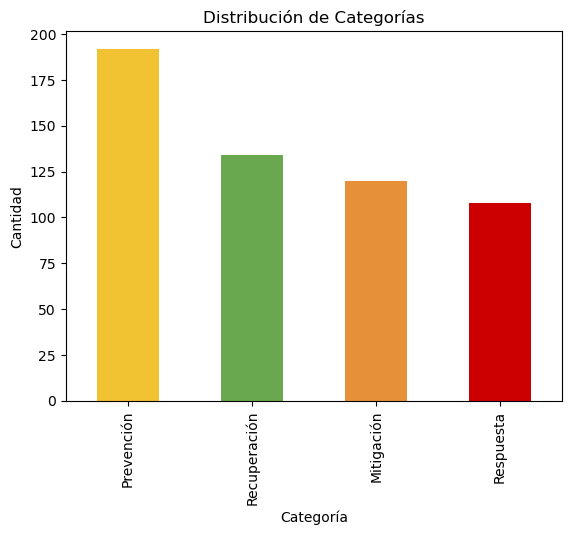

In [28]:
#Distribución de Categorías
category_distribution = df['category'].value_counts()
category_distribution.plot(kind='bar', color=[colores[c] for c in category_distribution.index])
plt.title('Distribución de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()



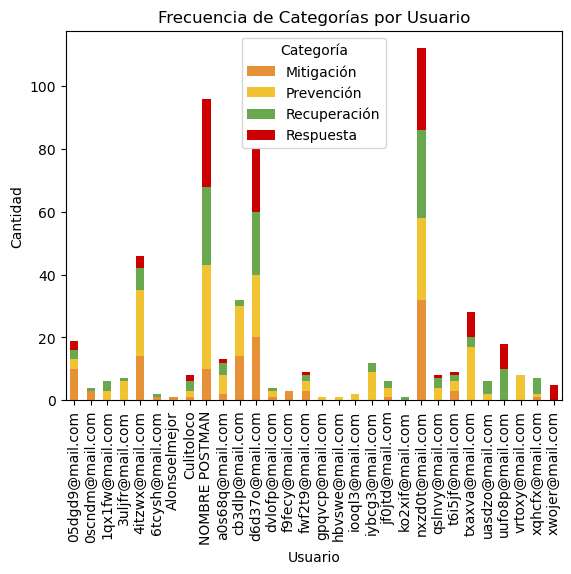

In [29]:
#Frecuencia por Usuario
user_category_frequency = df.groupby(['name', 'category']).size().unstack(fill_value=0)
user_category_frequency.plot(kind='bar', stacked=True, color=[colores[c] for c in user_category_frequency.columns])
plt.title('Frecuencia de Categorías por Usuario')
plt.xlabel('Usuario')
plt.ylabel('Cantidad')
plt.legend(title='Categoría')
plt.show()

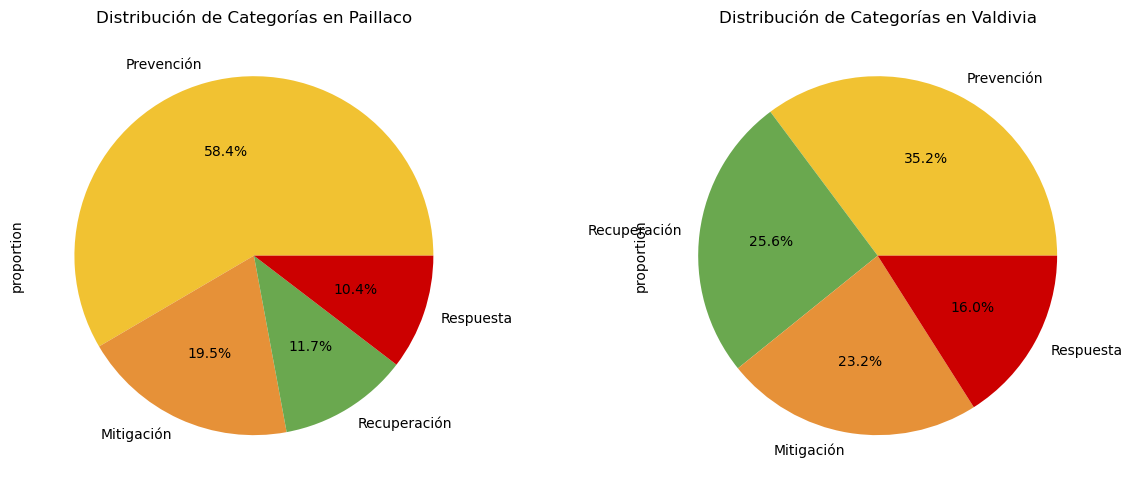

In [30]:
# Análisis Comparativo entre Comunas (Paillaco vs. Valdivia)
df_paillaco = df[df['commune'] == 'Paillaco']
df_valdivia = df[df['commune'] == 'Valdivia']

category_distribution_paillaco = df_paillaco['category'].value_counts(normalize=True)
category_distribution_valdivia = df_valdivia['category'].value_counts(normalize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para Paillaco
category_distribution_paillaco.plot(kind='pie', autopct='%1.1f%%', ax=ax1, colors=[colores[c] for c in category_distribution_paillaco.index])
ax1.set_title('Distribución de Categorías en Paillaco')

# Gráfico para Valdivia
category_distribution_valdivia.plot(kind='pie', autopct='%1.1f%%', ax=ax2, colors=[colores[c] for c in category_distribution_valdivia.index])
ax2.set_title('Distribución de Categorías en Valdivia')

plt.tight_layout()
plt.show()

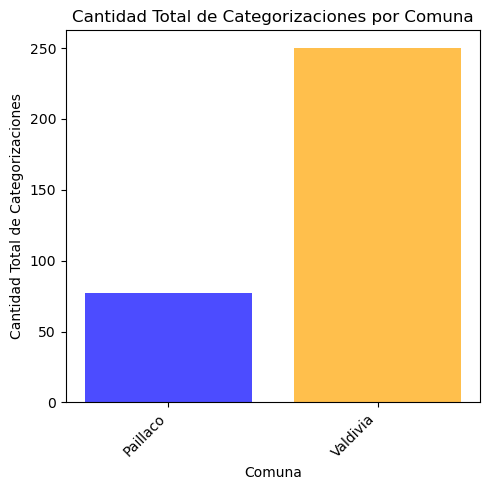

In [53]:
# Obtener la cantidad total de categorizaciones para Paillaco
total_paillaco = len(df_paillaco)

# Obtener la cantidad total de categorizaciones para Valdivia
total_valdivia = len(df_valdivia)

# Crear un gráfico de barras
plt.figure(figsize=(5, 5))
plt.bar(['Paillaco', 'Valdivia'], [total_paillaco, total_valdivia], color=['blue', 'orange'], alpha=0.7)

# Personalizar el gráfico
plt.title('Cantidad Total de Categorizaciones por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad Total de Categorizaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

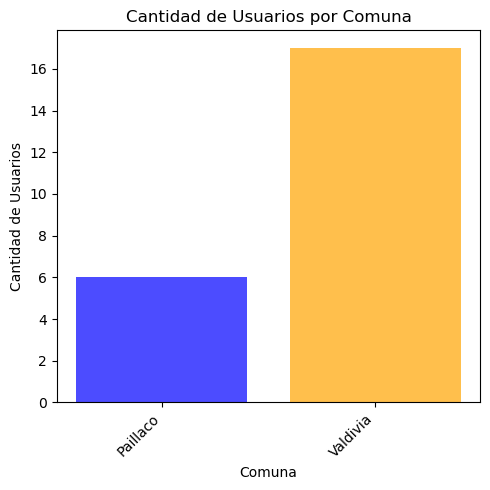

In [55]:
# Obtener la cantidad de usuarios únicos para Paillaco
usuarios_paillaco = df_paillaco['name'].nunique()

# Obtener la cantidad de usuarios únicos para Valdivia
usuarios_valdivia = df_valdivia['name'].nunique()

# Crear un gráfico de barras
plt.figure(figsize=(5, 5))
plt.bar(['Paillaco', 'Valdivia'], [usuarios_paillaco, usuarios_valdivia], color=['blue', 'orange'], alpha=0.7)

# Personalizar el gráfico
plt.title('Cantidad de Usuarios por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Análisis Estadístico

In [73]:
# Calcular precisión para Paillaco
precision_paillaco = (df_paillaco['category'] == df_paillaco['Categoria Correcta']).mean()

# Calcular precisión para Valdivia
precision_valdivia = (df_valdivia['category'] == df_valdivia['Categoria Correcta']).mean()

print(f"Precisión para categorizar de Paillaco: {precision_paillaco:.2%}")
print(f"Precisión para categorizar de Valdivia: {precision_valdivia:.2%}")


Precisión para categorizar de Paillaco: 7.79%
Precisión para categorizar de Valdivia: 22.40%


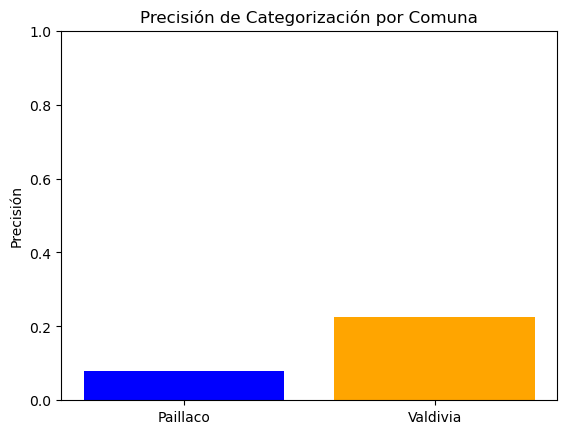

In [52]:
# Graficar la precisión de Paillaco y Valdivia
plt.bar(['Paillaco', 'Valdivia'], [precision_paillaco, precision_valdivia], color=['blue', 'orange'])
plt.title('Precisión de Categorización por Comuna')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.show()


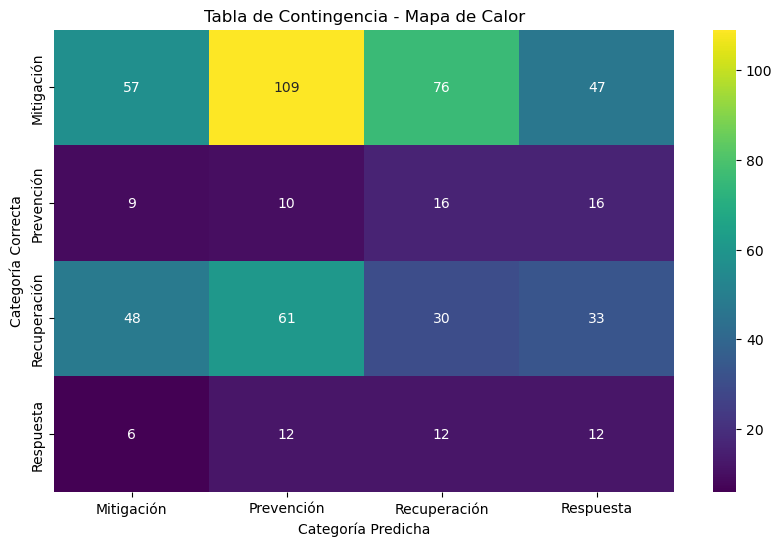

In [74]:
# Crear la tabla de contingencia
contingency_table = pd.crosstab(df['Categoria Correcta'], df['category'])



# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d', cbar=True)
plt.title('Tabla de Contingencia - Mapa de Calor')
plt.xlabel('Categoría Predicha')
plt.ylabel('Categoría Correcta')
plt.show()

### Precisión por cada categoría

In [35]:
precision_por_categoria = df.groupby('Categoria Correcta')['idImage'].apply(lambda x: (x == x.mode()[0]).mean())
print(precision_por_categoria)


Categoria Correcta
Mitigación      0.121107
Prevención      0.098039
Recuperación    0.063953
Respuesta       0.095238
Name: idImage, dtype: float64


### Prueba de Chi-Cuadrado

In [72]:
from scipy.stats import chi2_contingency

# Variables 'category' y 'commune' 
contingency_table = pd.crosstab(df['category'], df['commune'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Cuadrado: {chi2}, p-valor: {p}")


Chi-Cuadrado: 54.603844315218396, p-valor: 2.081313987962903e-06


### T-Student

In [39]:
from scipy.stats import ttest_ind

# Convertir las categorías a códigos numéricos
df['category_code'] = pd.Categorical(df['category']).codes

# Filtrar los datos por comunidad
elecciones_paillaco = df[df['commune'] == 'Paillaco']['category_code']
elecciones_valdivia = df[df['commune'] == 'Valdivia']['category_code']

# Aplicar la prueba de t de Student
t_statistic, p_value = ttest_ind(elecciones_paillaco, elecciones_valdivia, equal_var=False)

# Imprimir los resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

# Interpretar los resultados
if p_value < 0.05:
    print("Hay una diferencia significativa en las elecciones de categorías entre Paillaco y Valdivia.")
else:
    print("No hay evidencia suficiente para afirmar que hay una diferencia significativa.")


Estadístico t: -1.8496395957716345
Valor p: 0.06636332350383516
No hay evidencia suficiente para afirmar que hay una diferencia significativa.


### Tasa concordancia simple y correlación de Kendall

In [62]:
from scipy.stats import kendalltau

# Tasa de Concordancia Simple para una comunidad
def simple_agreement_rate(data):
    total_obs = len(data)
    agreement = sum(data['category'] == data['Categoria Correcta'])
    return agreement / total_obs

# Calcular la Tasa de Concordancia Simple para Paillaco
concordance_rate_paillaco = simple_agreement_rate(df_paillaco)

# Prueba de Correlación de Kendall para Paillaco
tau_paillaco, p_value_paillaco = kendalltau(df_paillaco['category'], df_paillaco['Categoria Correcta'])

# Tasa de Concordancia Simple para Valdivia
concordance_rate_valdivia = simple_agreement_rate(df_valdivia)

# Prueba de Correlación de Kendall para Valdivia
tau_valdivia, p_value_valdivia = kendalltau(df_valdivia['category'], df_valdivia['Categoria Correcta'])

# Imprimir resultados para Paillaco
print("Resultados para Paillaco:")
print(f"Tasa de Concordancia Simple: {concordance_rate_paillaco}")
print(f"Coeficiente de Correlación de Kendall (Tau): {tau_paillaco}")
print(f"Valor p: {p_value_paillaco}")

# Imprimir resultados para Valdivia
print("\nResultados para Valdivia:")
print(f"Tasa de Concordancia Simple: {concordance_rate_valdivia}")
print(f"Coeficiente de Correlación de Kendall (Tau): {tau_valdivia}")
print(f"Valor p: {p_value_valdivia}")


Resultados para Paillaco:
Tasa de Concordancia Simple: 0.07792207792207792
Coeficiente de Correlación de Kendall (Tau): -0.04086791505755754
Valor p: 0.7047229318922061

Resultados para Valdivia:
Tasa de Concordancia Simple: 0.224
Coeficiente de Correlación de Kendall (Tau): 0.06045075181857407
Valor p: 0.282512243833584
